## **Setup Environment & Run Packages**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from scipy.stats import shapiro #hypthesis test for normality
import scipy.stats as stats #QQ plot for testing normality

## **Load Data**

َAfter cleaning data, now we can import cleaned data.

In [2]:
data = pd.read_csv('../dataset/Cleaned_df.csv')
df = data.copy()

## **1-Check Normality**

In this section, we must make sure which variables are normal, and which of them are not. For this aim, I use hypothesis test beside QQ plots.
* Null = Data is distributed normaly
* Alternate = Data is not distributed normaly

#### **1.1 - Build Functions**

In [3]:
def Shapiro(Var):
    stat, p_value = shapiro(df[Var])
    print('{}: p-value {}'.format(Var, round(p_value, 4)))

In [4]:
def Norm_Plot(Var):
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    col = Var
    ax_qq = axes[0]
    ax_hist = axes[1]

    # Normal Probability Plot
    stats.probplot(df[Var], dist='norm', plot=ax_qq)
    ax_qq.set_title('Normal Probability Plot of {}'.format(col))

    # Histogram
    df[Var].plot(kind='hist', ax=ax_hist, bins=20)
    ax_hist.set_title('Histogram of {}'.format(col))

    plt.tight_layout()
    plt.show()

#### **1.2 - tenure**

In [5]:
Shapiro('tenure')

tenure: p-value 0.0


The null hypothesis is rejected. So, data is not normaly distributed.

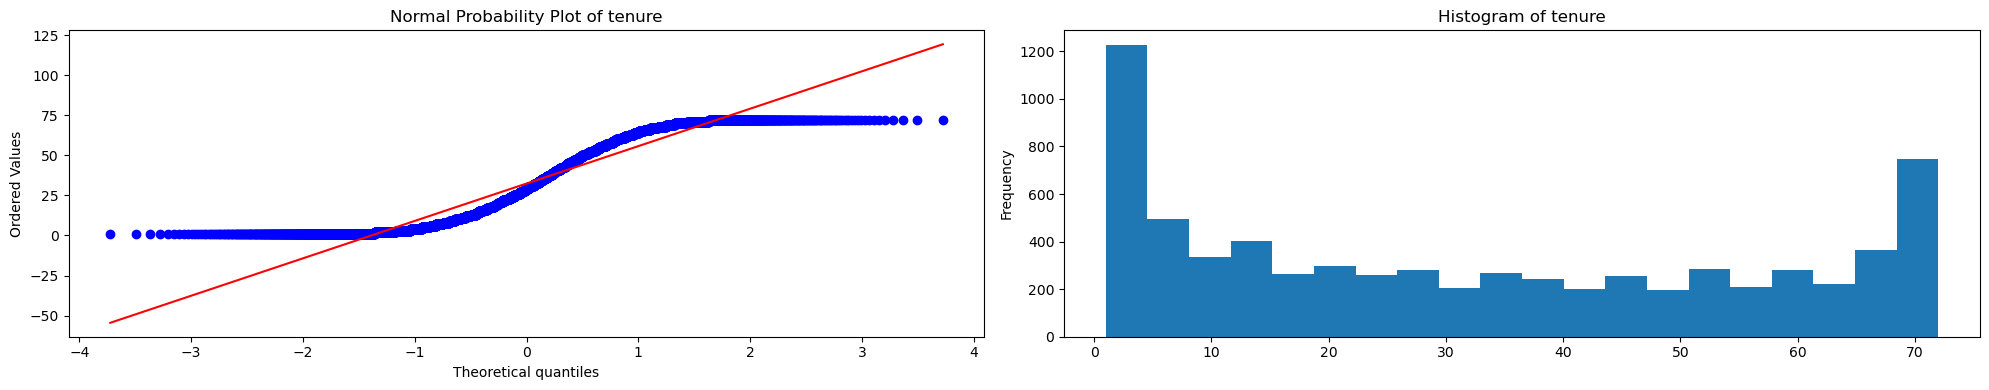

In [6]:
Norm_Plot('tenure')

p-value of 0 indicates that the null hypothesis of normality is rejected at the chosen significance level. In other words, the data does not follow the normal distribution

#### **1.3 - MonthlyCharges**

In [7]:
Shapiro('MonthlyCharges')

MonthlyCharges: p-value 0.0


The null hypothesis is rejected. So, data is not normaly distributed.

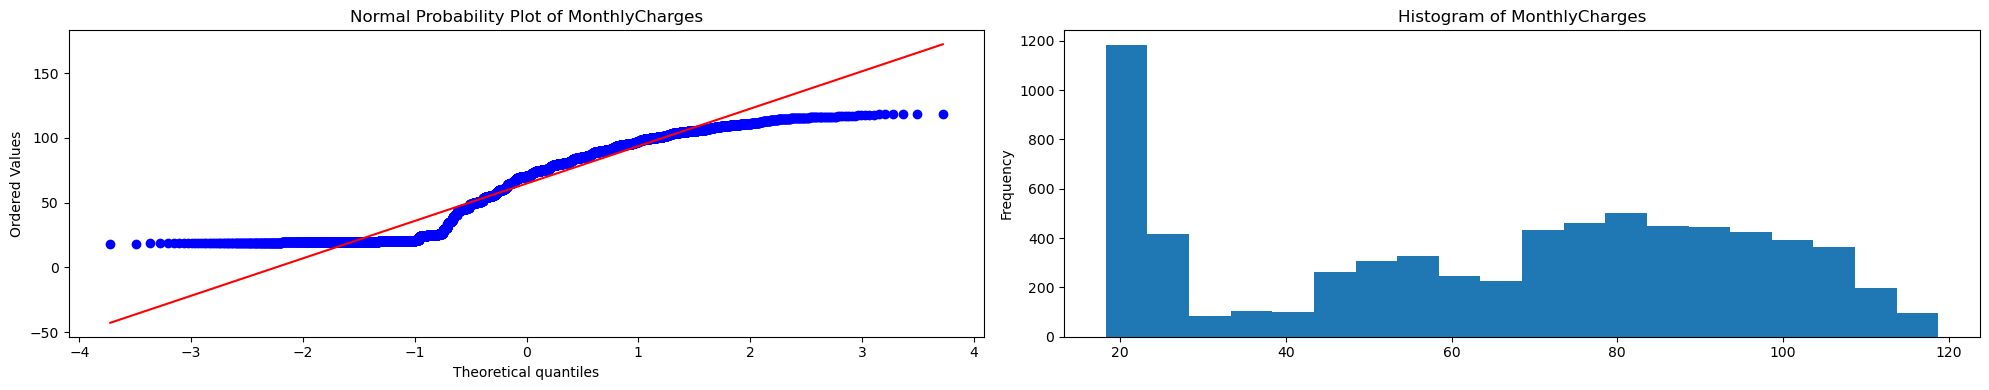

In [8]:
Norm_Plot('MonthlyCharges')

#### **1.4 - TotalCharges**

In [9]:
Shapiro('TotalCharges')

TotalCharges: p-value 0.0


The null hypothesis is rejected. So, data is not normaly distributed.

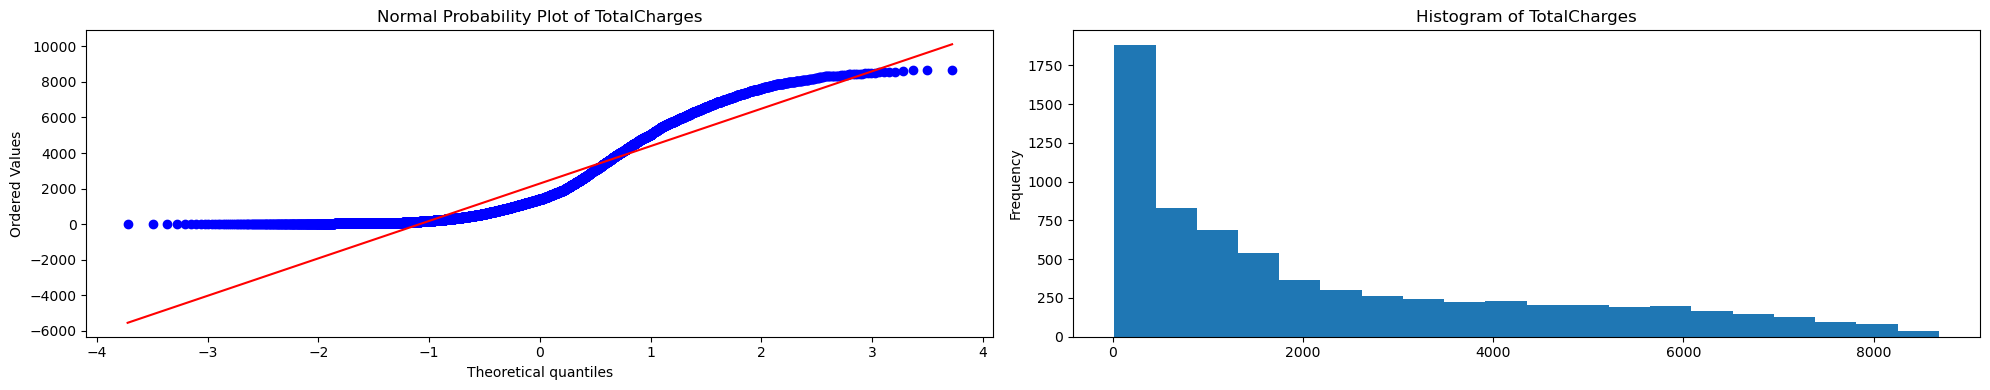

In [10]:
Norm_Plot('TotalCharges')

## **2-Outlier Detection**

For normaly distribution, we use boxplot (based on z-score) that is a method of displaying a distribution of data based off the minimum, maximum lower quartile, upper quartile and the median. An outlier is a datapoint that falls outside the whiskers of the plot. First we create a function and then apply it for all numerical variables that are normal distributed.

In [17]:
def boxplot_outliers(data, column_names):
    z_score_lower = -1.96  # Adjust z-score threshold as needed
    z_score_upper = 1.96
    num_columns = data.shape[1]
    fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(4*num_columns, 6))
    for i, ax in enumerate(axes[0]):
        column = data[:, i]
        sns.boxplot(x=column, ax=ax)
        ax.set_ylabel('Values')
        ax.set_xlabel(column_names[i])
    for i, ax in enumerate(axes[1]):
        column = data[:, i]
        sns.kdeplot(x=column, ax=ax)
        ax.set_xlabel(column_names[i])

    plt.tight_layout()
    plt.show()

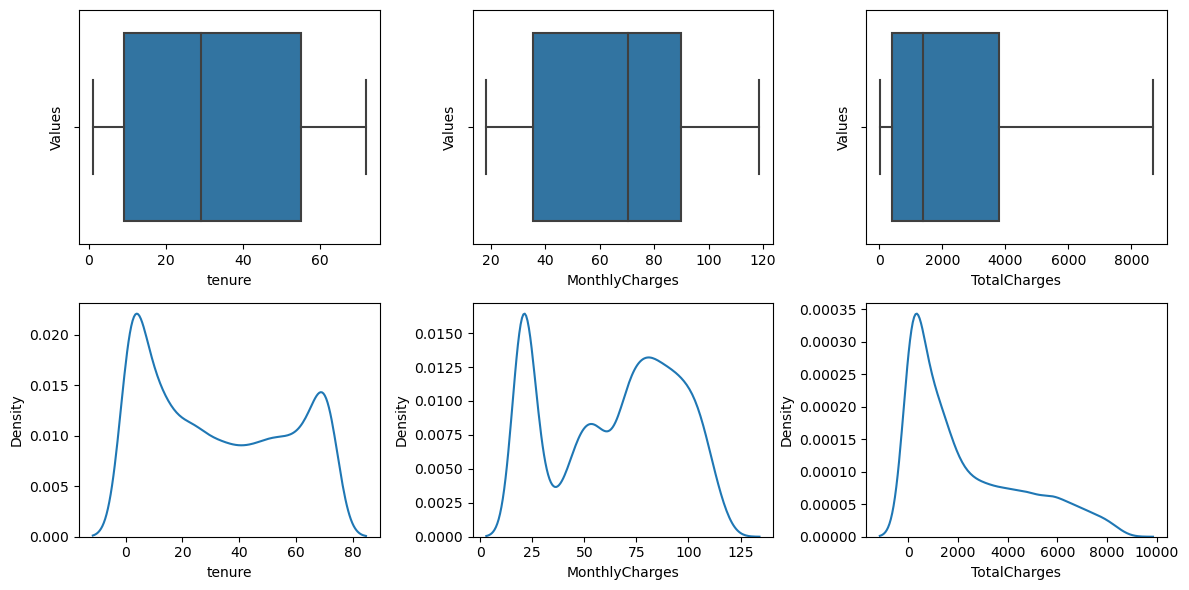

In [18]:
column_names = ['tenure', 'MonthlyCharges', 'TotalCharges']
boxplot_outliers(df[['tenure', 'MonthlyCharges', 'TotalCharges']].values, column_names)